# X-Ray Transformer Design

A single phase, high voltage, high frequency, 30kW transformer design is required for a mobile X-Ray device. The transformer is located at the center of the X-Ray circuit, transferring 30kW of power for a maximum duration of 100ms from the single phase input to the high voltage output. The output is rectified and fed to an X-Ray tube.

An examplary X-ray circuit can be seen on the following figure.

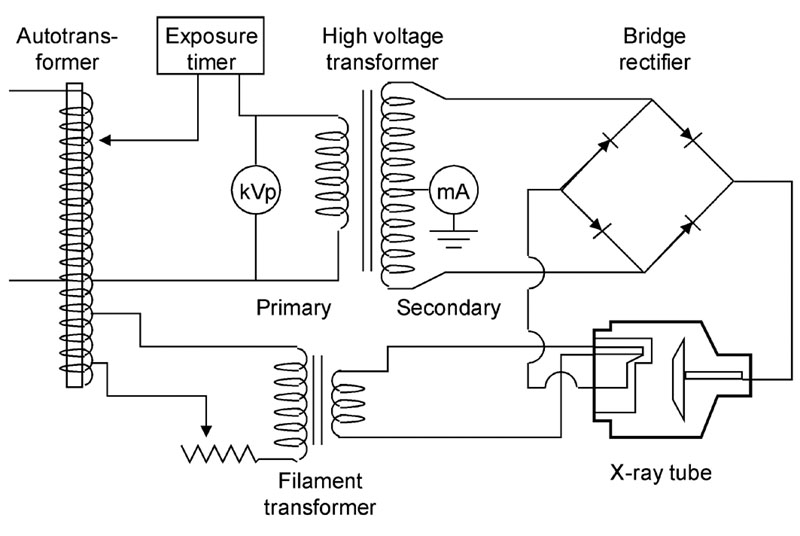

In [1]:
from IPython.display import Image
Image(filename='x-ray circuit.jpg', width=500, height=500)

One of the design constraints is the output power, Po. The secondary winding must be capable of delivering to the load within specified regulation limits. Another constraint is the minimum efficiency of operation, which is dependent upon the maximum power loss that can be allowed in the transformer.

One of the basic steps in transformer design is the selection of proper core material. For a 100 kHz transformer ferrite materials (MnZn or Nizn) can be used. The maximum flux density of these are 0.3-0.5T and 0.3-0.4T respectively.

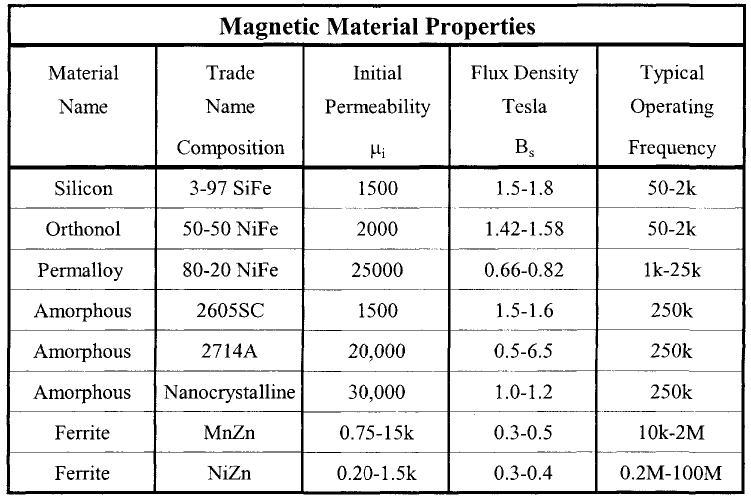

In [2]:
from IPython.display import Image
Image(filename='Magnetic materials.png', width=500, height=500)

Other constraints relate to the volume occupied by the transformer and the weight, since weight minimization is an important goal. Finally, cost effectiveness is always an important consideration.

Depending upon the application, certain ones of these constraints will dominate. Parameters affecting others may then be traded off as necessary to achieve the most desirable design. It is not possible to optimize all parameters in a single design because of their interaction and interdependence.

A rule of thumb can be used for the transformer design process. Still the procedure given in this project is free of assumptions and develops an optimal design with a great accuracy.

**Wa**...Window area

**Ac**...Core area

**Wa*Ac=Ap**...Area Product

**Kg**...Core geometry (related to the regulation and power handling ability of core)

The above mentioned parameters can be used as tools to simplify and standardize the process of transformer design, without going through a cut-and-try design procedure.

The following instructions are the design specification for a 30kW x-ray transformer, operating at 100kHz, using core geometry, Kg approach.

# Design Inputs

In [3]:
Vp=417 #Input (primary) voltage
Vs=12500 #Output (secondary) voltage
Pout=30000 #Output power
f=100000 #Frequency
Ta_min=0 #Min ambient temperature
Ta_max=40 #Max ambient temperature

# Design Process

In [4]:
import math
Vp_p=Vp*4/math.pi #Peak primary voltage
Vs_p=Vs*4/math.pi #Peak secondary voltage
Vp_rms=Vp_p/math.sqrt(2) #Primary rms voltage
Vs_rms=Vs_p/math.sqrt(2) #Secondary rms voltage

In [5]:
Alpha=0.5 #Regulation constant as %
Bm=0.35 #Operating flux density of the core
Eff=0.95 #Initial efficiency target

Efficiency is not a design criterion for this project but the design procedure requires an efficiency to be set initially

In [6]:
Skin_depth=6.62/math.sqrt(f) #Skin depth in cm
print ('Skin_depth =',round(Skin_depth,3),'cm')
Dw=2*Skin_depth #Wire diameter in cm
print ('Dw =',round(Dw,4),'cm')
Aw=math.pi*Dw*Dw/4 #Bare wire area in cm^2
print ('Aw =',round(Aw,4),'cm^2')

Skin_depth = 0.021 cm
Dw = 0.0419 cm
Aw = 0.0014 cm^2


## _Wire Selection_

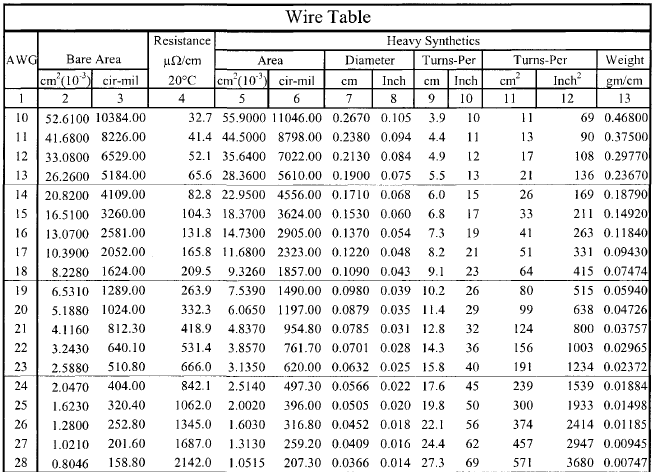

In [7]:
from IPython.display import Image
Image(filename='Wire table.png', width=600)

AWG24 cable with a bare wire area 0.002047 cm^2 will be used.

In [8]:
Aw=0.002047
Res=842 #Resistivity of AWG24 wire in uOhm/cm at 20 degrees celcius
Cuw=0.01884 #Weight of copper in g/cm

In [9]:
Pin=Pout/Eff
Pt=Pin+Pout #Total (apparent) power associated with the core geometry
print ('Pt =',round(Pt),'W')

Pt = 61579 W


In [10]:
Ip=Pin/Vp #Primary current
Is=Pout/Vs #Secondary current
Ip_rms=Pin/Vp_rms #Primary rms current
Is=rms=Pout/Vs_rms #Secondary rms current
print ('Ip =',round(Ip,1),'A')
print ('Is =',round(Is,1),'A')

Ip = 75.7 A
Is = 2.7 A


## _Core Geometry Calculation_

The following calculates the electrical conditions, Ke

In [11]:
Kf=4 #Waveform coefficient for square wave
Ke=0.145*(Kf**2)*(f**2)*(Bm**2)*(10**-4) #Electrical conditions
print ('Ke =',round(Ke))

Ke = 284200


The following calculates the core geometry, Kg. When operating at high frequencies, the window utilization factor, Ku has to be taken into accouınt. When using small bobbin ferrites, the ratio of the bobbin winding area to the core window area is only about 0.6. Operating at 100kHz and having to use AWG24 wire, because of the skin effect, the ratio of the bare copper area to the total area is 0.78. Therefore, the overall window utilization, Ku is reduced. To return the design back to the norm, the core geometry, Kg is to be multiplied by 1.35, and then, the current density, J is calculated, using a window utilization factor of 0.29.

In [12]:
Kg=Pt/(2*Ke*Alpha)
Kg=Kg*1.35 #Corrected core geometry coefficient
print ('Kg =',round(Kg,3),'cm^5')

Kg = 0.293 cm^5


## _Core Selection_

From the ferrite core database, a suitable core using Kg parameter is selected. The selected core is ETD-44 and it has the following data:

In [13]:
Wtcu=93.2 #Copper weight in grams
Wtfe=94.0 #Iron weight in grams
MLT=9.4 #Mean length turn in cm
MPL=10.3 #Magnetic path length in cm
Wa=2.785 #Window area in cm^2
Ac=1.742 #Effective cross section of the core in cm^2
Wa_Ac=1.599,#Wa/Ac ratio
Ap=4.852 #Area product in cm^4
Kg=0.3595 #Core geometry coefficient in cm^5
At=87.9 #Surface area of the transformer in cm^2
AL=1682 #ınductance factor in mH/1K (nH)

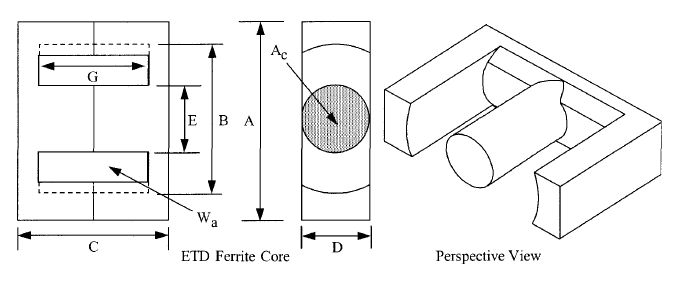

In [14]:
from IPython.display import Image
Image(filename='Dimension outline for ETD ferrite cores.png', width=600)

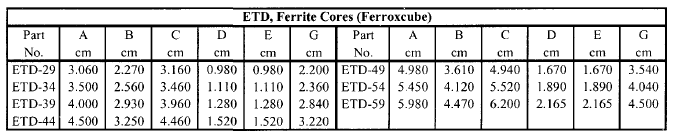

In [15]:
from IPython.display import Image
Image(filename='Dimensional data for ETD ferrite cores.png', width=600)

## _Primary and Secondary Turn Numbers_

In [16]:
Np=(Vp*10**4)/(Ac*Bm*f*Kf) #Primary number of turns using Faraday's Law
Np=math.ceil(Np)
print('Np =',Np,'turns')

Np = 18 turns


In [17]:
Ns=Np*Vs/Vp*(1+Alpha/100) #Secondary number of turns is calculated
Ns=math.floor(Ns)
print('Ns =',Ns,'turns')

Ns = 542 turns


In [18]:
Ns1=(Vs*10**4)/(Ac*Bm*f*Kf) #Alternatively secondary number of turns using Faraday's Law
Ns1=math.floor(Ns1)
print('Ns1 =',Ns1,'turns')

Ns1 = 512 turns


There is a major difference between Ns and Ns1. We know that the basic equation **Vs/Vp = Ns/Np** should be satisfied. Therefore, Ns=542 is the proper selection for secondary number of turns.

## _Calculation of Primary and Secondary Strands_

In [19]:
Ku=0.29 #Utilization factor (window utilization)
J=(Pt*10**4)/(Kf*Ku*Bm*f*Ap) #Current density in A/cm^2
print('J =',round(J,2),'A/cm^2')

J = 3125.97 A/cm^2


In [20]:
Dmax=0.5 #Max duty of the transformer
Awp=Ip*math.sqrt(Dmax)/J #Primary wire area in cm^2
Sp=Awp/Aw #Number of primary strands
Sp=math.ceil(Sp)
print ('Awp =',round(Awp,4),'cm^2')
print ('Sp =',Sp)

Awp = 0.0171 cm^2
Sp = 9


In [21]:
Aws=Is*math.sqrt(Dmax)/J #Secondary wire area in cm^2
Ss=Aws/Aw #Number of secondary strands
Ss=math.ceil(Ss)
print ('Aws =',round(Aws,4),'cm^2')
print ('Ss =',Ss)

Aws = 0.0006 cm^2
Ss = 1


## _Copper Loss Calculation_

In [22]:
Res_p=Res/Sp #Primary resistivity due to paralleling
Rp=MLT*Np*Res_p*10**-6 #Primary resistance
print ('Rp =',round(Rp,4),'Ohms')

Rp = 0.0158 Ohms


In [23]:
Pp_cu=Ip**2*Rp #Primary copper loss
print ('Pp_cu =',round(Pp_cu,2),'watts')

Pp_cu = 90.78 watts


In [24]:
Res_s=Res/Ss #Secondary resistivity due to paralleling
Rs=MLT*Ns*Res_s*10**-6 #Secondary resistance
print ('Rs =',round(Rs,4),'Ohms')

Rs = 4.2898 Ohms


In [25]:
Ps_cu=Is**2*Rs #Secondary copper loss
print ('Ps_cu =',round(Ps_cu,2),'watts')

Ps_cu = 30.48 watts


In [26]:
Pcu=Pp_cu+Ps_cu #Total copper loss as the sum of primary and secondary copper losses in watts
print ('Pcu =',round(Pcu,2),'watts')

Pcu = 121.26 watts


In [27]:
Alpha=(Pcu/Pout)*100 #Regulation as percentage
print ('Alpha =',round(Alpha,3))

Alpha = 0.404


## _Core Loss Calculation_

In [28]:
Pv=(4.316*10**-5)*(f**1.64)*(Bm**2.68) #Relative core losses in mW/g
print('Pv =',round(Pv,3),'mW/g')
Pfe=Pv*Wtfe*10**-3 #Core losses in watts
print ('Pfe =',round(Pfe,2),'watts')

Pv = 410.378 mW/g
Pfe = 38.58 watts


## _Total Losses and Watts per Area_

In [29]:
Ploss=Pcu+Pfe #Total losses in the transformer
print ('Ploss =',round(Ploss,2),'watts')

Ploss = 159.84 watts


In [30]:
Wpa=Ploss/At #Watts per unit area
print ('Wpa =',round(Wpa,2),'watts/cm^2')

Wpa = 1.82 watts/cm^2


## _Temperature Rise Calculation_

Temperature rise is found on the following calculation

In [31]:
Tr=450*Wpa**0.826 #Temp rise in degrees celcius
print ('Tr =',round(Tr,2),'C')

Tr = 737.43 C


Such a temp rise is unacceptable but the transformer is not fully utilized.

Since Ploss is not continuous, a utilization factor, **_uf_** can be used to reduce the continuous load. That is assume losses are distributed to a larger period until the transformer's next use.

100ms is the maximum duration for the transformer to deliver 30kW. Take an average cycle time of 1 minute.

## _Bringing Down the Temperature Rise to an Acceptable Value_

In [32]:
uf=0.1/(60) #100ms usege in 1 minute
Ploss_new=Ploss*uf #Recalculated total losses
print ('Ploss_new =',round(Ploss_new,2),'watts')

Ploss_new = 0.27 watts


In [33]:
Wpa_new=Ploss_new/At #Recalculated watts per unit area
print ('Wpa_new =',round(Wpa_new,4),'watts/cm^2')

Wpa_new = 0.003 watts/cm^2


In [34]:
Tr_new=450*Wpa_new**0.826 #Temp rise in degrees celcius
print ('Tr_new =',round(Tr_new,2),'C')

Tr_new = 3.74 C


## _Validation of Window Utilization_

Now calculate the total window utilization, Ku

In [35]:
Kup=Np*Sp*Aw/Wa #Primary window utilization
print ('Kup =',round(Kup,2))
Kus=Ns*Ss*Aw/Wa #Secondary window utilization
print ('Kus =',round(Kus,2))
Ku_new=Kup+Kus
print ('Ku_new =',round(Ku_new,2))

Kup = 0.12
Kus = 0.4
Ku_new = 0.52


Starting from 0.29 up to 0.7 different Ku values are tried and the following results are obtained:

* Ku=0.29 --> Ku_new=0.52
* Ku=0.4 --> Ku_new=0.56
* Ku=0.5 --> Ku_new=0.6
* Ku=0.6 --> Ku_new=0.64
* Ku=0.7 --> Ku_new=0.68

The recalculated Ku value shall be smaller than the initiall assumed one. However, as Ku increases copper losses decrease but the weight of the transformer increase the. For an optimum design, the initial Ku value is set to 0.29. So that the current density value is increased but the initial statement is kept same.

It should also be noted that the increased Ku value makes the production more difficult.

The surrounding medium of the transformer is oil for this design since it is in an oil tank. Therefore, a small amount of temperature rise will not be negligible. If the surrounding medium was air and if it was not vantilated (forced air cooling), temperature rise would be important.

Another advantage of the oil is that any insulation material (between primary and secondary windings due to very high voltage difference) will not be needed since oil is itself a good insulator. If it is necessary to use extra insulation, lower Ku values will be in advantage of the designer since the copper area in the total window area is low.

## _Validation of Efficiency Calculation_

The efficiency target should also be reached. Remember that the initial assumption was 95%.

Now check the transformer efficiency to if it is above the initial assumption or not.

In [36]:
Eff_new=Pout/(Pout+Ploss) #New efficiency rating
print ('Eff_new =',round(Eff_new*100,1),'%')

Eff_new = 99.5 %


## _Total Mass Calculation_

In [37]:
Wcup=MLT*Np*Sp*Cuw #Primary copper weight in grams
Wcus=MLT*Ns*Ss*Cuw #Secondary copper weight in grams
Wcu=Wcup+Wcus #Total copper weight in grams
Wfe=Wtfe #Core weight as specified in the core datasheet in grams
Wtotal=Wcu+Wfe #Total weight in grams
print ('Wtotal =',round(Wtotal,1),'g')

Wtotal = 218.7 g


Here, copper weight information given in the core datasheet is not used. Instead, primary and secondary copper wire lengths are calculated. Copper weight is calculated for AWG24 wire. Bobbin weight is ignored. Total weight is given above.

## _Cost Calculation_

In [38]:
Pw=0.0053 #Price of AWG24 copper wire per cm
Len=MLT*(Np*Sp+Ns*Ss) #Total wire length
Pwire=Pw*Len #Wire cost
Pcore=4.28 #Core cost
Pbobbin=2.89 #Bobbin cost
Ptotal=Pwire+Pcore+Pbobbin #Total cost
print ('Ptotal =',round(Ptotal,1),'$')

Ptotal = 42.2 $


[See Core Price](http://tr.farnell.com/ferroxcube/etd44-22-15-3c90/ferrite-core-etd-3c90/dp/3056405)

[See Bobbin Price](http://tr.farnell.com/ferroxcube/cph-etd44-1s-18p/bobbin-etd44-1-section-18pin/dp/3056326)

[See Cable Price](http://uk.farnell.com/te-connectivity-raychem/fldwc0311-0-25-0/wire-black-0-25mm-100m/dp/797972)

**_THE END_**

------------------------------------------------------------------------------
*The rest is unused information which may be used later. So I wanted to keep them.*

The power handling capability of a core is related to its area product, Ap, by an equation which may be stated as below:

In [ ]:
'''
Ap1=(Pt*10**4)/(Bm*f*J*Kf*Ku) #Area product definition comes from this equation
Ap=Wa*Ac #Area product
print (Ap1)
'''

The minimum size of a transformer is usually determined either by a temperature rise limit, or by allowable voltage regulation, assuming that size and weight are to be minimized. Then "alpha" is defined as regulation coefficient.

In [ ]:
'''
Pcu=Pp_cu+Ps_cu
alpha1=(Pcu/Po)*100 #Regulation as percentage
print alpha1
'''

Although most transformers are designed for a given temperature rise, they can also be designed for a given regulation.

In [ ]:
'''
MLT= 15 #Mean Length Turn for the core in cm
Kg=(Wa*Ac**2*Ku)/(MLT)
Ke=0.145*Kf**2*f**2*Bm**2*(10**-4)
alpha2=Pt/(2*Kg*Ke) #Another definition for regulation
print (Kg)
print (Ke)
print (alpha2)
'''